# Practice 1 of the Computational Mechanics course of the Simon Bolivar University

## Interpolation of curves using the Lagrange polynomial

In [1]:
from sympy import init_session
init_session(use_latex=True)
%matplotlib inline

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
def Lagrange(X:list,Y:list,xx):
    # Number of points
    nx = len(X)
    ny = len(Y)
    
    # Veifying that X and Y are lists
    if not isinstance(X, list):
        raise ValueError("X and Y arguments must be lists")
    elif not isinstance(Y, list):
        raise ValueError("X and Y arguments must be lists")
    # Checking that X,Y lists are the same size
    elif nx!=ny:
        raise ValueError("X,Y lists of values are not the same size")
    # Checking that there are no repeated values of X
    elif len(set(X))!=nx:
        List=[]
        for i in X:
            if List.count(i)>0:
                print(f"The value {i} of X is repeated\n",i)
            else:
                List.append(i)
        raise ValueError("There are repeated values of X")
     
    # Lagrange interpolation method
    else:
        # Calculation of Lagrange multipliers
        n = nx
        L = zeros(n,1)
        for i in range(n):
            num = [(x-X[j]) for j in range(n) if j!=i]
            den = [(X[i]-X[j]) for j in range(n) if j!=i]
            N, D = 1, 1 
            for nn in num: N*=nn
            for dd in den: D*=dd
            L[i] = N/D
        
        # Interpolating polynomial
        Pol = 0
        for i in range(n):
            Pol += Y[i] * L[i]
        
        # Interpolation
        yy = Pol.subs(x,xx)
        # Graphics
        p1 = plot(Pol, show=True)
        
    return(yy,L,Pol)

In [3]:
X = [0,2,3,10,12]
Y = [-1,1,2,3,4]

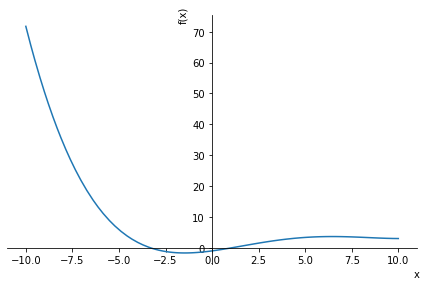

In [4]:
yy, L, P = Lagrange(X,Y,1)

In [5]:
P

C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
Th

In [6]:
simplify(P)

In [7]:
L

⎡(x - 12)⋅(x - 10)⋅(x - 3)⋅(x - 2)⎤
⎢─────────────────────────────────⎥
⎢               720               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 10)⋅(x - 3)   ⎥
⎢  ─────────────────────────────  ⎥
⎢               160               ⎥
⎢                                 ⎥
⎢   x⋅(x - 12)⋅(x - 10)⋅(x - 2)   ⎥
⎢   ───────────────────────────   ⎥
⎢               189               ⎥
⎢                                 ⎥
⎢  -x⋅(x - 12)⋅(x - 3)⋅(x - 2)    ⎥
⎢  ────────────────────────────   ⎥
⎢              1120               ⎥
⎢                                 ⎥
⎢   x⋅(x - 10)⋅(x - 3)⋅(x - 2)    ⎥
⎢   ──────────────────────────    ⎥
⎣              2160               ⎦

In [8]:
yy